/tmp/ipykernel_4130960/385087259.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


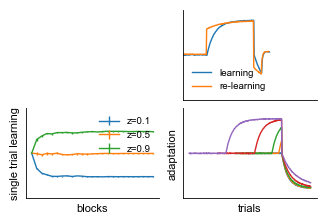

('repertoirePlot.pdf', 'repertoirePlot.svg')

In [38]:
# Retry with corrected parsing of family/suffix from keys (handles 'dual_rate_*').

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Circle, FancyArrow

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable




import pickle
with open('oooo_signoff.pkl','rb') as f:
    ooo = pickle.load(f)

rng = np.random.default_rng(7)

def load_or_mock(path):
    if os.path.exists(path):
        try:
            arr = np.loadtxt(path, dtype=float)
            return np.array(arr).reshape(-1)
        except Exception:
            pass
    return np.clip(rng.normal(0.65, 0.12, size=16), 0, 1)

# base_dir = "/mnt/data"
base_dir=''

data = {k: load_or_mock(p) for k,p in filenames.items()}
for k,p in filenames.items():
    if not os.path.exists(p):
        np.savetxt(p, data[k], fmt="%.6f")

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.6,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "legend.frameon": False,
    "pdf.fonttype": 42, "ps.fonttype": 42, "svg.fonttype": "none",
})

def mm_to_in(mm): return mm/25.4
# W = mm_to_in(183)
W = mm_to_in(80)
H = W * 0.45*1.5 #0.9
fig, axes = plt.subplots(2, 2, figsize=(W, H), constrained_layout=True,)
# fig, axes = plt.subplots(4, 4, figsize=(W, H), constrained_layout=True)
# plt.subplots_adjust(wspace=0.02, hspace=0.02, left=1)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
order = ["coin_a", "dual_rate_a", "dual_rate_x", "clnn_a", "clnn_x", "clnn_u"]
# families = {"coin": "///", "dual_rate": "xx", "clnn": "++"}
# families = {"coin": "", "dual_rate": "xx", "clnn": "++"}
# suffix_colors = {"a": "#254EDB", "x": "#E59F00", "u": "#F6C453"}
# families = {"coin": "#254EDB", "dual_rate": "#9B28AA", "clnn": "#F58529"}
# suffixes = {"a": "", "x": "//", "u": "xx"}
# sfx_for_legend = {"a": "output\n or input", "x": "internal\n node", "u": "efference\n copy"}
# fam_for_legend = {"coin": "COIN", "dual_rate": "dual-rate", "clnn": "CLNN"}
def subgroup(idx):
    return "SR" if idx < 8 else "ER"
bg_color = {"SR": "#F7FBFF", "ER": "#FFF8F0"}

xpos = np.arange(len(order))
bar_width = 0.9
edge_width = 0.6
highlight_width = 2.4

YRANGE = 300          # ← the common height you want
means = [np.mean([data[k][s] for k in order]) for s in range(16)]


ax = axes[0, 1]
# ax.set_facecolor(bg_color[subgroup(s)])
# ax.plot(x_pert,pert, label='experiment', marker='o', color='black', alpha=1,  markersize=1.5,linewidth=1)
# ax.plot(x_pert[np.isnan(pert)],np.isnan(pert)[np.isnan(pert)]*0,':', label='experiment', marker=None, color='black', alpha=0.4,  markersize=1.5,linewidth=5.)
# ccc = FancyArrow(240,1, -30, -0, width=0.1, length_includes_head=True, head_width=0.2, head_length=10, color='red', alpha=0.5)
ax.plot(ooo['savings'][:221].mean(axis=1) , label='learning')
ax.plot(ooo['savings'][221:].mean(axis=1), label='re-learning')
ax.set_yticks([])      # no ticks
ax.set_xticks([])      # no ticks
ax.set_ylim(-1.2, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
# ax.plot(-prior_a, label='prior', linestyle='-', color='tab:orange', alpha=0.4, linewidth=2)
ax.set_ylim(-1.2, 1.2)
# if s==0:
#     ax.set_yticks([])      # no ticks
#     ax.set_xticks([])      # no ticks 
# else:
#     ax.set_xlabel("trials")
#     ax.set_ylabel("perturbation / adaptation")
#     ax.text(10.05, -1.0, 'force field')
#     ax.text(210, -1.0, 'channel')

# if s==0: ax.title.set_text('perturbation')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
def organize_bg(ax):
    ax.axvspan(0, 190, facecolor='green', alpha=0.12, zorder=0)
    ax.axvspan(190, 340, facecolor='gray',  alpha=0.12, zorder=0)
    ax.set_xlim(0,340)
# organize_bg(ax)
ax.set_xlim(0,340)

ax = axes[1, 0]

deltas_by_super_scenario = {}
for i, this_data in enumerate([ooo]):
    # plt.subplot(4,4,i+1)
    for iz, z in enumerate(ooo.keys()):
        if 'herzfeld' not in z:
            continue
        else:
            scenario = z
            super_scenario = z.split('$')[0]
        deltas = []
        mm = lambda x: np.mean(x,axis=0)
        # scenario = f'herzfeld,z={z}'
        this_result = this_data[scenario].mean(axis=1)
        pointer = 0
        for bb in range(25):
            block_length = len(this_result)//25
            # pointer += block_length
            # deltas.append(this_result[pointer-1]-this_result[pointer-3])
            deltas.append(this_result[pointer+2]-this_result[pointer])
            pointer += block_length

        if super_scenario not in deltas_by_super_scenario:
            deltas_by_super_scenario[super_scenario] = []
        deltas_by_super_scenario[super_scenario].append(deltas)
        # plt.plot(deltas,'x',label = f'z={z}')
        # plt.title('environmental consistency')
    # plt.legend(loc='upper right')
# plt.figure()
for k in deltas_by_super_scenario:
    # plt.plot(np.mean(deltas_by_super_scenario[k],axis=0),label=k)
    #present with error bars
    data = np.array(deltas_by_super_scenario[k])
    mean = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    ax.errorbar(np.arange(len(mean)),mean,yerr=std/np.sqrt(data.shape[0]),label=k[9:])
# ax.set_xlim(0,340)

ax.set_yticks([])      # no ticks
ax.set_xticks([])      # no ticks
ax.set_ylim(-1.2, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('single trial learning')
ax.set_xlabel('blocks')
ax.legend(framealpha=1, facecolor="white", loc='upper right', fontsize=7, edgecolor="black")

# plt.title('environmental consistency')

# # ax.set_facecolor(bg_color[subgroup(s)])
# ax.plot(-exp_data, label='experiment', marker='o', color='black', alpha=0.7,  markersize=1.5,linewidth=0.001)
# ax.plot(-prior_a, label='model mean', linestyle='-', color='tab:orange', alpha=0.4, linewidth=2)
# # if s==1: ax.legend(loc='lower left', fontsize=7, framealpha=0.5)
# ax.set_ylim(-1.2, 1.2)
# if True:
#     ax.set_yticks([])      # no ticks
#     ax.set_xticks([])      # no ticks 
# else:
#     ax.set_xlabel("trials")
#     ax.set_ylabel("perturbation / adaptation")


# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# organize_bg(ax)

ax = axes[1, 1]

ant_list = [f'AB{i}' for i in range(0,5)]

for ant in ant_list:
    x_data = np.arange(len(ooo[ant].mean(axis=1)))
    ax.plot(x_data-np.max(x_data),ooo[ant].mean(axis=1))


# ax.plot(-prior_a0123[:,0], label='prior', linestyle='-', color='tab:blue',linewidth=2)
# ax.plot(-prior_a0123[:,1:], label='prior', linestyle='-', color='tab:blue', alpha=0.4, linewidth=1)
#remove all the axes decorations
ax.set_yticks([])      # no ticks
ax.set_xticks([])      # no ticks
ax.set_ylim(-1.2, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('adaptation')
ax.set_xlabel('trials')
# ax.title.set_text('samples from model')
# organize_bg(ax)

ax = axes[0, 0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set_ylabel('adaptation')
# ax.set_xlabel('trials')


# ymin = min(values.min(), subject_mean) - 0.05 * max(1e-6, abs(values).max())
# ymax = max(values.max(), subject_mean) + 0.08 * max(1e-6, abs(values).max())

# best_val = values.min()
# for i, key in enumerate(order):
#     parts = key.split("_")
#     fam = "_".join(parts[:-1])
#     sfx = parts[-1]
    # color = suffix_colors[sfx]
    # hatch = families[fam]
    # color = families[fam]
    # hatch = suffixes[sfx]
    # lw = highlight_width if np.isclose(values[i], best_val) else edge_width
    # ax.bar(i, values[i], width=bar_width, color=color, edgecolor="black",
    #        linewidth=lw, hatch=hatch)

# ax.axhline(subject_mean, ls="--", lw=0.8, color="0.4", dashes=(2,2), zorder=0)
# subject_mean = means[s]
# ax.set_ylim(subject_mean - YRANGE/2, subject_mean + YRANGE/2)
# ax.text(0.3, 0.02, f"{subgroup(s)}{s%8+1}", ha="center", va="bottom", transform=ax.transAxes, fontsize=8)
# ax.set_ylim(ymin, ymax)
# ax.set_xticks(xpos)
# if r==3 and c==0:
#     ax.set_xticklabels(["COIN","dual-rate OL","dual-rate CL ($\eta_{x_s}$)","CLNN OL","CLNN CL ($\eta_x$)","CLNN CL ($\eta_u$)"], rotation=35, ha="right")
# # if c == 0:
#     ax.set_ylabel("                                        BIC [nats] (smaller = better)", labelpad=2)
#     ax.set_yticklabels([])

# else:
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
# ax.set_title(f"S{s+1:02d} • {subgroup(s)}", pad=2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])

if not True: # c==0:
    ax.set_yticks([])     
        # no ticks
# for spine in ax.spines.values():           # no box around the axes
#     spine.set_visible(False)
# also remove per-axes titles/labels if you had any:
# ax.set_xlabel(""); ax.set_ylabel(""); ax.set_title("")

# Legends
# color_handles = [Patch(facecolor=col, edgecolor="black", label=fam_for_legend[sfx]) for sfx, col in families.items()]
# hatch_handles = [Patch(facecolor="white", edgecolor="black", hatch=h, label=sfx_for_legend[fam]) for fam,h in suffixes.items()]
# fig.legend(handles=hatch_handles, ncol=len(hatch_handles), loc="lower left", bbox_to_anchor=(0.01, 1.04), frameon=False, title="noise injected to")
# fig.legend(handles=color_handles, ncol=len(color_handles), loc="lower right", bbox_to_anchor=(0.99, 1.04), frameon=False, title="model")
# fig.suptitle("Model Comparison", y=1.06, fontsize=9)



pdf_path = os.path.join(base_dir, "repertoirePlot.pdf")
svg_path = os.path.join(base_dir, "repertoirePlot.svg")
fig.savefig(pdf_path, format="pdf", bbox_inches="tight", transparent=True)
fig.savefig(svg_path, format="svg", bbox_inches="tight", transparent=True)
plt.show()

pdf_path, svg_path


In [39]:
os.path.join(base_dir, "subject_bar_grid.svg")

'subject_bar_grid.svg'

In [40]:
print( [k for k in ax.spines.keys()])

['left', 'right', 'bottom', 'top']


In [41]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [42]:
print( [k for k in ax.spines.keys()])

['left', 'right', 'bottom', 'top']
